In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [4]:
df_data = pd.read_csv('../Resources/Training_data.csv', infer_datetime_format=True)
df_data.rename(columns={'Unnamed: 0':'ds', 'Close':'y'}, inplace= True)

In [5]:
df_data.head()

,ds,Open,High,Low,y,Adj Close,Volume,SMA_agg,RSI_ratio,CCI,MACD_ratio,ADX,ADX_dirn,ATR_ratio,BBands_high,BBands_low,SMA_vol_agg,Currency,Returns
0,2019-09-18 19:00:00+01:00,14913.389648,14961.690430,14910.490234,14919.860352,14919.860352,53569.0,0.998720,1.015040,166.666667,-0.869569,52.927061,0.0,1.059797,0.999398,1.002477,0.665225,BTC/AUD,0.002185
1,2019-09-18 20:00:00+01:00,14923.549805,14954.759766,14906.230469,14936.620117,14936.620117,55768.0,0.999212,1.086659,86.831023,-0.000001,44.151881,0.0,1.023529,0.999215,1.003660,0.596677,BTC/AUD,0.001123
2,2019-09-18 21:00:00+01:00,14914.089844,14963.049805,14895.769531,14957.429688,14957.429688,61484.0,1.000231,1.143585,72.833673,-2.469266,39.780911,0.0,1.033983,0.999182,1.004327,0.558987,BTC/AUD,0.001393
3,2019-09-18 22:00:00+01:00,14958.599609,14966.950195,14925.269531,14940.080078,14940.080078,103132.0,1.000794,0.999589,79.504221,-16.916743,34.729405,0.0,0.988863,1.000795,1.002382,0.622359,BTC/AUD,-0.001160
4,2019-09-18 23:00:00+01:00,14940.080078,14948.669922,14896.980469,14896.980469,14896.980469,62138.0,1.001076,0.751507,-154.742871,-5.806505,36.938127,0.0,0.975789,1.003602,0.999144,0.661203,BTC/AUD,-0.002885


In [10]:
df_curr = df_data.loc[ df_data.Currency == 'ADA/AUD', ['ds', 'y']].copy()
df_curr['ds'] = pd.to_datetime(df_curr['ds'], utc=True)
df_curr['ds'] = df_curr['ds'].dt.tz_convert(None)
df_curr.shape

(15165, 2)

In [11]:
X = df_curr.iloc[:15000]

In [12]:
model = Prophet()
model.fit(X)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


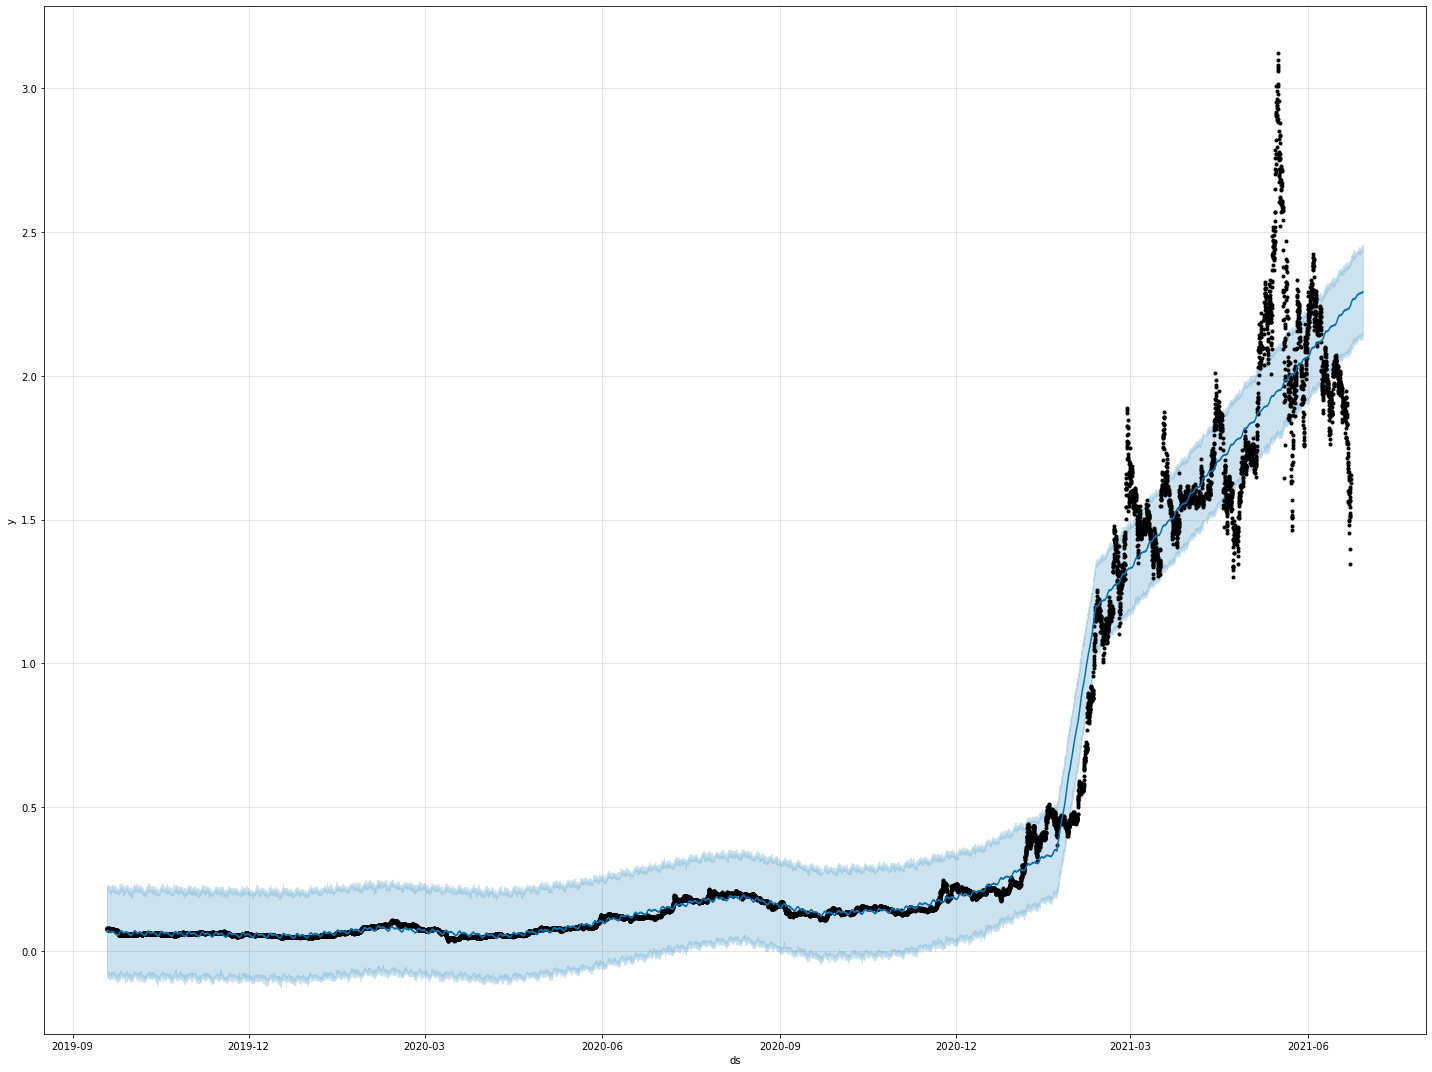

In [24]:
future = model.make_future_dataframe(periods=150, freq='H')
fcst = model.predict(future)
fig = model.plot(fcst, figsize=(20,15))


In [23]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-23 04:00:00,2.250589,2.095677,2.406289,2.250589,2.250589,-0.001823,-0.001823,-0.001823,-0.000571,-0.000571,-0.000571,-0.001252,-0.001252,-0.001252,0.0,0.0,0.0,2.248765
1,2021-06-23 05:00:00,2.250923,2.108718,2.405130,2.250923,2.250923,-0.000296,-0.000296,-0.000296,0.000391,0.000391,0.000391,-0.000687,-0.000687,-0.000687,0.0,0.0,0.0,2.250627
2,2021-06-23 06:00:00,2.251258,2.105898,2.403749,2.251258,2.251258,0.000837,0.000837,0.000837,0.000956,0.000956,0.000956,-0.000120,-0.000120,-0.000120,0.0,0.0,0.0,2.252095
3,2021-06-23 07:00:00,2.251592,2.093644,2.414979,2.251592,2.251592,0.001424,0.001424,0.001424,0.000977,0.000977,0.000977,0.000447,0.000447,0.000447,0.0,0.0,0.0,2.253017
4,2021-06-23 08:00:00,2.251927,2.116433,2.401319,2.251927,2.251927,0.001738,0.001738,0.001738,0.000728,0.000728,0.000728,0.001010,0.001010,0.001010,0.0,0.0,0.0,2.253665
